In [24]:
import os
import sys
import importlib

project_dir = '/mnt/c/Users/kevin/OneDrive/2-code/1-Research_projects/1-project-categorical-MMN'
src_dir = os.path.join(project_dir, 'src')
sys.path.append(src_dir)
import parameters as params
import classes as cl
import basic_functions as bf


data_dir = os.path.join(project_dir, 'data/sims/script1')

import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")


In [2]:
# definition of the list of parameters to be varied
Tinter_list = [0.2,0.5,0.7,1.0,1.5,2.0]
nbr_rep_list = [1,2,3,4,5,6,7,8,9,10]
dev_id_list = [88,78,68,58,48,38,28]

df_mmn_effect = pd.DataFrame(columns=['Tinter', 'nbr_rep_std', 'dev_id', 'mmn_effect'])
mmn_effect = np.zeros((len(Tinter_list),len(nbr_rep_list),len(dev_id_list)))

In [17]:
tinter = 0.5
nbr_rep = 5
dev_id = 88

file_dir = os.path.join(data_dir, 'script1_Tinter' +str(tinter) + '_nbr_rep_'+str(nbr_rep)+'_dev_id_'+str(dev_id)+'.json')

temp_dict = json.load(open(file_dir))

pc_layer = np.asarray(temp_dict['pc_firing_rates'])
pc_max = np.amax(pc_layer,axis = 0)
rep_range = np.arange(1,len(pc_max)+1)
#careful there is one more rep than expected due to the way the change of stim is computed (probably not)

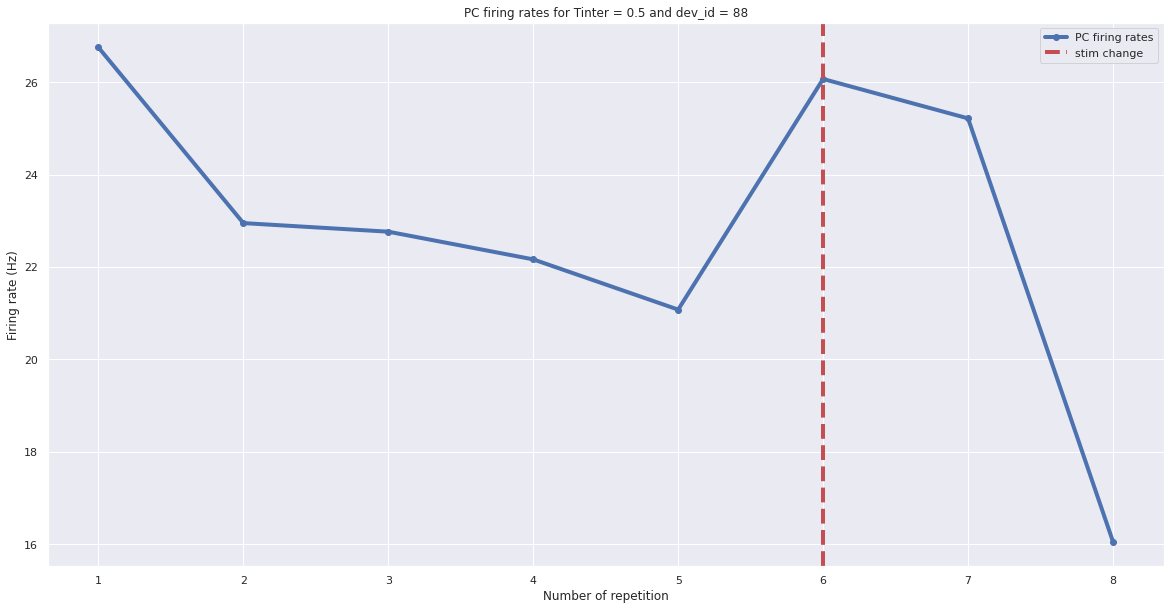

In [25]:
plt.plot(rep_range,pc_max, label = 'PC firing rates', marker = 'o', linewidth = 4)
plt.axvline(x=nbr_rep+1, color='r', linestyle='--', label = 'stim change', linewidth = 4)
plt.ylabel('Firing rate (Hz)')
plt.xlabel('Number of repetition')
plt.title('PC firing rates for Tinter = '+str(tinter)+' and dev_id = '+str(dev_id))
# plt.style.use("dark_background")

plt.legend()

In [5]:
for i,tinter in enumerate(Tinter_list):
    for j,nbr_rep in enumerate(nbr_rep_list):
        for k,dev_id in enumerate(dev_id_list):
            file_dir = os.path.join(data_dir, 'script1_Tinter' +str(tinter) + '_nbr_rep_'+str(nbr_rep)+'_dev_id_'+str(dev_id)+'.json')
            temp_dict = json.load(open(file_dir))
            pc_layer = np.asarray(temp_dict['pc_firing_rates'])
            pc_max = np.amax(pc_layer,axis = 0)
            mmn_effect[i,j,k] = pc_max[nbr_rep] - pc_max[nbr_rep-1]
            df_mmn_effect = df_mmn_effect.append({'Tinter':tinter, 'nbr_rep_std':nbr_rep, 'dev_id':dev_id, 'mmn_effect':mmn_effect[i,j,k]}, ignore_index=True)

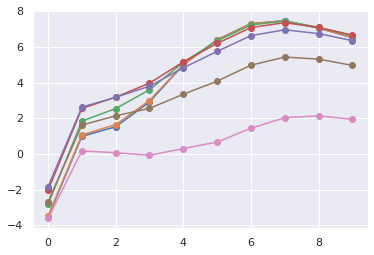

In [7]:
plt.plot(mmn_effect[1,:,:], label = 'PC firing rates', marker = 'o')

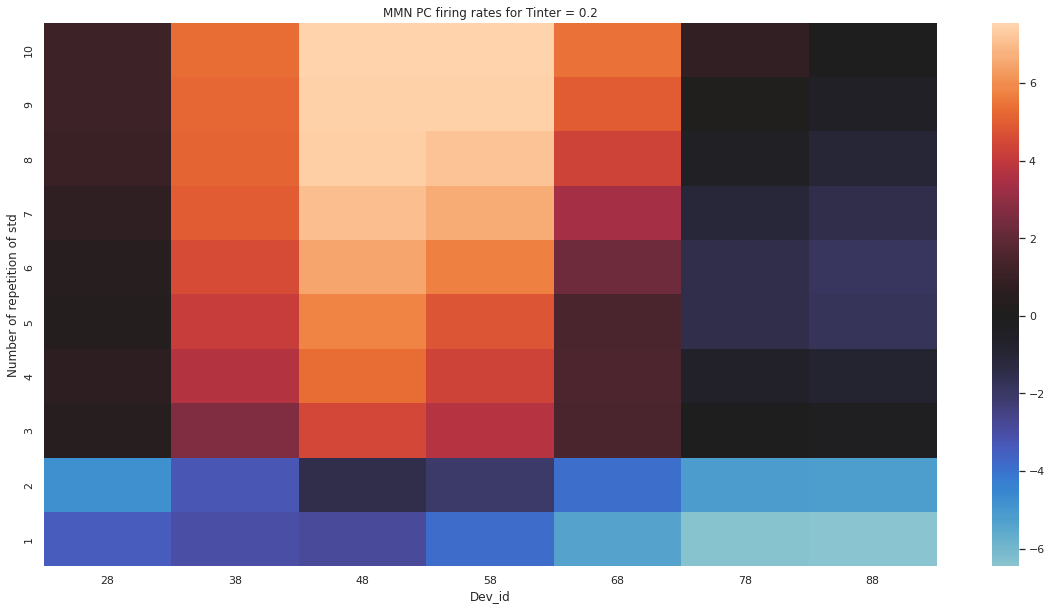

In [15]:
import matplotlib as mpl
sns.set_theme(style="darkgrid")
def plot_MMN_heatmap(i):
    ax = sns.heatmap(mmn_effect[i,:,:], center = 0, xticklabels = dev_id_list, yticklabels= nbr_rep_list)
    ax.invert_yaxis()
    ax.invert_xaxis()
    plt.xlabel('Dev_id')
    plt.ylabel('Number of repetition of std')
    plt.title('MMN PC firing rates for Tinter = ' + str(Tinter_list[i]))
    plt.style.use("dark_background")
    plt.show()

plot_MMN_heatmap(0)

Interesting feature, there seems to be some innate categorical effect within this interneuron structure. Neurons at the opposite side of the standard category don't seem to exhibit MMN effect. 

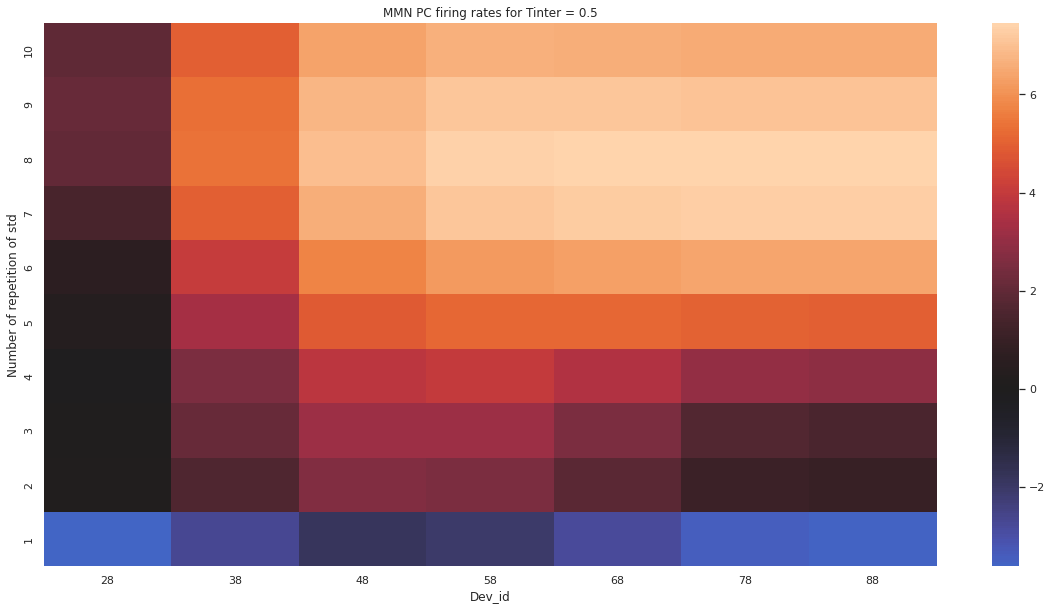

In [11]:
mpl.rcParams['figure.figsize'] = (20, 10)
plot_MMN_heatmap(1)

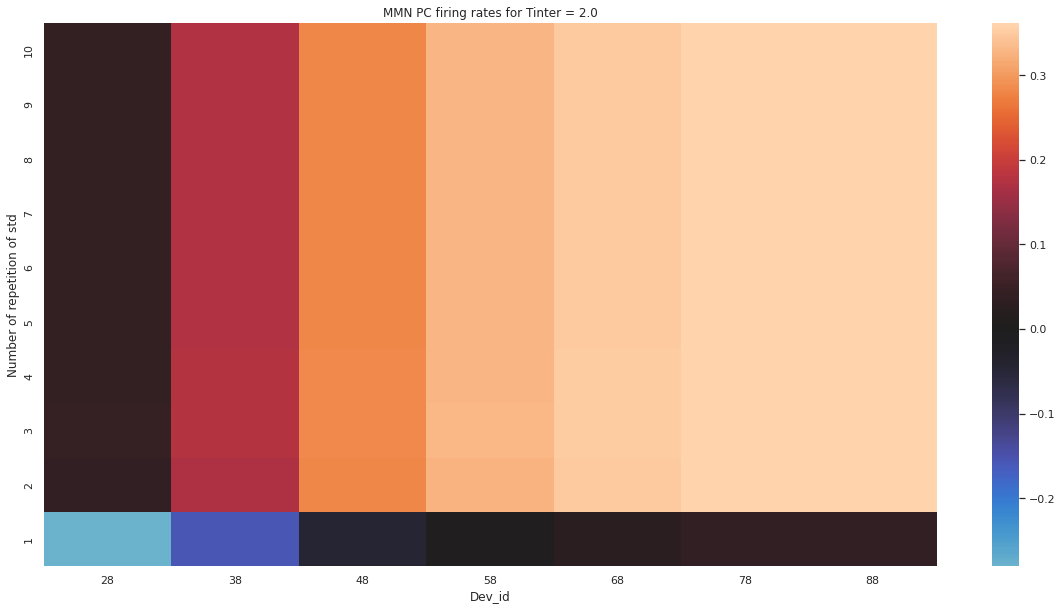

In [12]:
plot_MMN_heatmap(5)

## What happens as a function of Tinter?

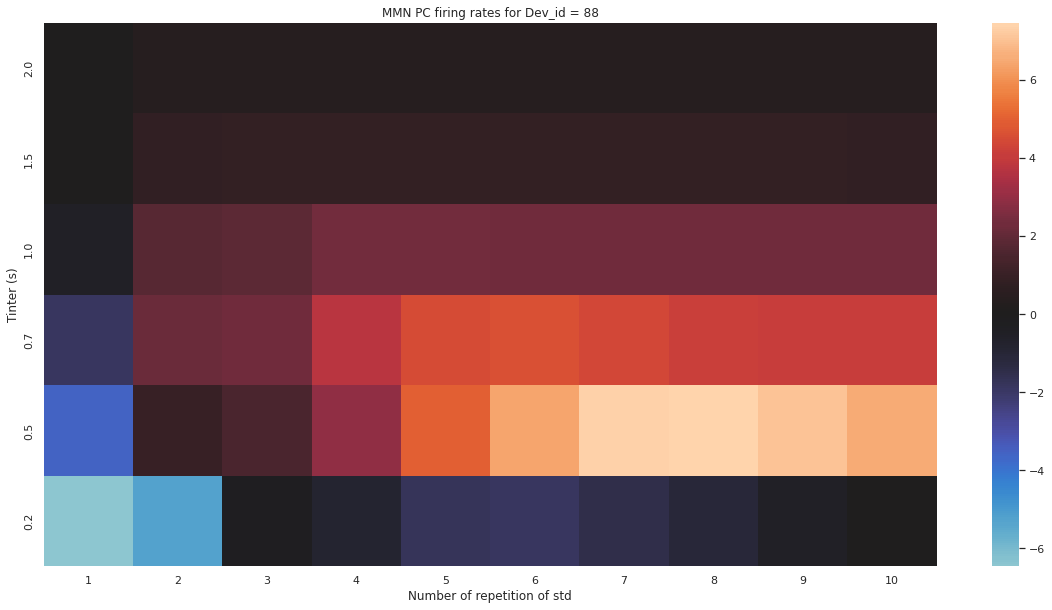

In [32]:
import matplotlib as mpl
sns.set_theme(style="darkgrid")
def plot_MMN_heatmap_fixed(k):
    ax = sns.heatmap(mmn_effect[:,:,k], center = 0, yticklabels = Tinter_list, xticklabels= nbr_rep_list)
    ax.invert_yaxis()
    # ax.invert_xaxis()
    plt.ylabel('Tinter (s)')
    plt.xlabel('Number of repetition of std')
    plt.title('MMN PC firing rates for Dev_id = ' + str(dev_id_list[k]))
    # plt.style.use("dark_background")
    plt.show()

plot_MMN_heatmap_fixed(0)

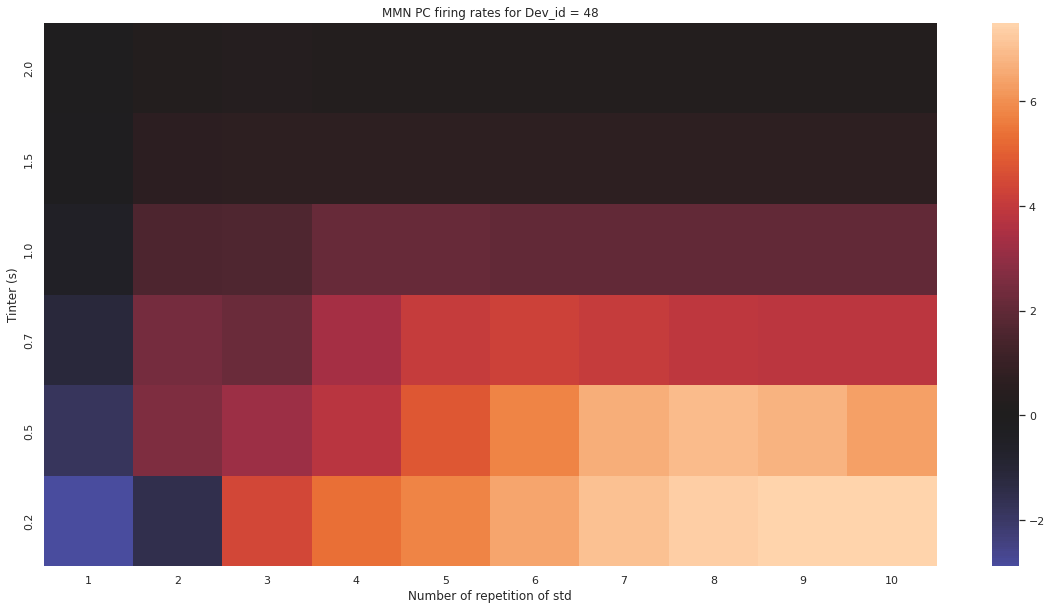

In [33]:
plot_MMN_heatmap_fixed(4)